<img src="Imagenes/Mac_wallpaper_3.png" width="50%">

In [ ]:
!pip install "qiskit[visualization]" --user

In [ ]:
!pip install qiskit-aer --user

# Algoritmo de Simon

El algoritmo de Simon fue el primer algoritmo en mostrar un aumento de velocidad exponencial respecto del mejor algoritmo clásico para resolver un problema específico.

### El problema de Simon

Nuevamente, recibimos una función misteriosa $f$, pero esta vez mapea una cadena de $n$ bits a otra cadena de $n$ bits, y la única información que tenemos es que puede ser uno a uno (a cada input le corresponde un output único) o dos a uno (dos inputs comparten un output único), y en el caso de ser dos a uno tenemos que

Si tenemos dos cadenas de bits $x_{1}$ y $x_{2}$ y tenemos que su output es el mismo, es decir, $f(x_{1})=f(x_{2})$ entonces se cumple que $x_{1} = x_{2}\oplus b$ para una cadena de bits $b$ escondida. Por ejemplo, si $b=11$ entonces nuestra función $f(x)$ se podría comportar como

| x | f(x) |
| :--: | :--: |
| 00 | 10 |
| 01 | 11 |
| 10 | 11 |
| 11 | 10 |

Nuestra tarea es determinar si $f$ es uno a uno o dos a uno, y en el caso de que sea dos a uno, determinar la cadena de bits $b$. Sin embargo, ambos problemas se resumen en encontrar la cadena de bits $b$, pues una cadena de solo ceros ($b = 000...$) corresponde a una función $f$ que es uno a uno.

### El caso clásico

De manera similar al problema de Deutsch-Jozsa, podemos resolver este problema con solo llamar a la función dos veces si tenemos mucha suerte. En efecto, si nuestra función es dos a uno y nuestros primeros dos inputs $x_{1}$ y $x_{2}$ nos devuelven el mismo output, sabremos con total seguridad que nuestra función es dos a uno y encontrar la cadena $b$ se reduce a hacer la operación $x_{1}\oplus x_{2} = b$.

Sin embargo si nuestra función es uno a uno, o tenemos mucha mala suerte con una función que es dos a uno, resolver el problema con un 100% de seguridad requiere que llamemos a la función $2^{n-1}+1$ veces, donde $n$ es el número de bits en el input.

### El caso cuántico

El circuito cuántico que implementa el algoritmo de Simon se muestra a continuación (extraído del textbook de Qiskit):

<img src="Imagenes/Simon.png" width="40%">

Como podemos ver, el algoritmo es bastante parecido a los que hemos visto anteriormente, la diferencia más notoria se encuentra en nuestro output: este ahora tiene $n$ qubits y se encuentra inicializado en el estado $|0^{\oplus n}\rangle$. Además, esta vez también medimos nuestro output, y pronto veremos por qué. De momento, y utilizando las líneas segmentadas que se encuentran en el diagrama del circuito, vamos a listar los pasos del algoritmo de Simon:

1. Inicializamos los qubits del input y del output en el estado $|0^{\otimes n}\rangle$.
1. Le aplicamos una compuerta $H$ a todos los qubits del input.
1. Llamamos a la función $f(x)$, en la forma del operador $Q_{f}$.
1. Medimos los qubits del output.
1. Aplicamos una compuerta $H$ a todos los qubits del input nuevamente.
1. Medimos los qubits del input.

### Aplicación matemática del algoritmo

El estado inicial de nuestro sistema es:

$\hspace{11 cm} |\psi_{0}\rangle = |0^{\otimes n}\rangle|0^{\otimes n}\rangle$

Luego de aplicar todas las compuertas $H$ al input nuestro sistema queda como:

$\hspace{10 cm}|\psi_{1}\rangle = \dfrac{1}{\sqrt{2^{n}}}\displaystyle\sum_{x\in\{0,1\}^{n}}|x\rangle|0^{\otimes n}\rangle$

Ya que todos los qubits de nuestro output se encuentran en el estado cero, el efecto que tiene el operador $Q_{f}$ sobre el sistema es colocar el valor de $f(x)$ en los qubits del output:

$\hspace{10 cm}|\psi_{2}\rangle = \dfrac{1}{\sqrt{2^{n}}}\displaystyle\sum_{x\in\{0,1\}^{n}}|x\rangle|f(x)\rangle$

Cuando midamos los qubits del output veremos que uno de los posibles estados $|f(x)\rangle$ va a ser medido. Para tomar el caso más general posible vamos a considerar que $f(x)$ es dos a uno, por lo que después de hacer la medición nuestros qubits en el input se pueden encontrar en dos posibles estados: $|x\rangle$ o $|x\oplus b\rangle = |y\rangle$. Por lo que el estado de nuestro input luego de medir el output es

$\hspace{11 cm} \dfrac{1}{\sqrt{2}}(|x\rangle + |y\rangle)$

A partir de aquí ignoraremos el estado del output, pues ya fue medido.

Finalmente aplicamos las compuertas $H$ a los qubits del input, lo que transforma su estado en:

$\hspace{9 cm} \dfrac{1}{\sqrt{2^{n+1}}}\displaystyle\sum_{x\in\{0,1\}^{n}}[(-1)^{x\cdot z} + (-1)^{y\cdot z}]|z\rangle$

Al momento de hacer la medición solo podremos medir aquellos estados $|z\rangle$ que tengan una amplitud diferente de $0$. Para ello, requerimos que $(-1)^{x\cdot z} = (-1)^{y\cdot z}$, lo que significa que

$\hspace{4 cm} x\cdot z = y\cdot z \hspace{1 cm} x\cdot z = (x\oplus b)\cdot z \hspace{1 cm} x\cdot z = x\cdot z\oplus b\cdot z \hspace{1 cm} b\cdot z = 0$ mod 2

De esta forma obtendremos una cadena de bits $z$ que cumple con $b\cdot z = 0$ mod 2 cada vez que hagamos una medición. Por lo tanto, luego de repetir el algoritmo $\approx n$ veces tendremos una lista de $n$ cadenas de bits diferentes que podemos utilizar para crear el sistema de ecuaciones

$\hspace{8 cm} b\cdot z_{1} = 0 \hspace{2 cm} b\cdot z_{2} = 0 \hspace{1 cm} \cdots \hspace{1 cm} b\cdot z_{n} = 0$

que al resolverlo nos dará el valor de la cadena $b$.

*La cadena de solo ceros es la solución trivial de nuestro sistema de ecuaciones, por lo que debemos buscar otra solución, si la hay.*

Entonces, en este problema en particular el algoritmo cuántico realiza exponencialmente menos pasos que el algoritmo clásico.

*Nota: Es probable que obtengamos cadenas $z_{i}$ repetidas o cadenas que sean linealmente dependientes, lo que nos obligará a hacer unas cuantas mediciones adicionales además de las $n$ mandatorias. Sin embargo, este algoritmo sigue siendo mucho más rápido que los algoritmos clásicos aún con este problema.*

Si bien es difícil hallar una aplicación de este algoritmo, fue el primero que desmotró que es posible obtener una ventaja exponencial en el tiempo de resolución de ciertos problemas utilizando una computadora cuántica en lugar de una clásica.

### Circuito cuántico del algoritmo

Para codificar nuestra función $f(x)$ de manera general, vamos a hacer lo siguiente:

**Primer paso:** Vamos a "copiar" el valor del input en los qubits del output, de manera que

$\hspace{10 cm} |x\rangle|0\rangle \rightarrow |x\rangle|x\rangle$

**Segundo paso:** Vamos a tomar el bit menos significativo $b_{i}$ de $b$ y el bit menos significativo $x_{i}$ del input $x$. Si se cumple que $b_{i} = 1$ y $x_{i} = 0$ vamos a sumarle $b$ al output utilizando la suma por bits módulo 2, de manera que

$\hspace{10 cm} |x\rangle|x\rangle \rightarrow |x\rangle|x\oplus b\rangle$

En caso de que el bit menos significativo de $b$ no sea 1, nos movemos hacia la izquierda bit pot bit hasta encontrar un bit de $b$ que sea igual a 1 y entonces realizamos la suma. La suma puede hacerse utilizando compuertas CNOT.

De esta manera, si $b$ es la cadena de solo ceros no realizaremos el segundo paso del algoritmo y nuestra función quedará como una función de uno a uno. En caso contrario, será una función de dos a uno que cumple la condición $f(x)=f(y)$ si y solo si $x=y\oplus b$.

---

Ahora, resolvamos el problema de Simon con una función dos a uno que utiliza la cadena $b=100$. <br>
Primero que nada comprobemos que nuestro algoritmo para codificar $f(x)$ funciona como es debido:

In [12]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

estados = ["000","001","010","011","100","101","110","111"]

for estado in estados:

    qin = QuantumRegister(3)
    qout = QuantumRegister(3)
    c = ClassicalRegister(3)

    qc = QuantumCircuit(qin,qout,c)

#Preparamos los estados del input
    if int(estado[0]) == 1:
        qc.x(qin[2])
    if int(estado[1]) == 1:
        qc.x(qin[1])
    if int(estado[2]) == 1:
        qc.x(qin[0])
        
#Realizamos el primer paso de la función

    qc.cx(qin[0],qout[0])
    qc.cx(qin[1],qout[1])
    qc.cx(qin[2],qout[2])
        
#Realizamos el segundo paso de la función, recordando que b=100
    qc.x(qin[2])
    qc.cx(qin[2],qout[2])
    qc.x(qin[2])
    
#Medimos el output
    qc.measure(qout,c)
    
#Ejecutamos el circuito solo una vez, para ver cómo opera nuestra función
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1)
    counts = job.result().get_counts(qc)
    print("Input:",estado,"Output:",counts)

Input: 000 Output: {'100': 1}
Input: 001 Output: {'101': 1}
Input: 010 Output: {'110': 1}
Input: 011 Output: {'111': 1}
Input: 100 Output: {'100': 1}
Input: 101 Output: {'101': 1}
Input: 110 Output: {'110': 1}
Input: 111 Output: {'111': 1}


¡Perfecto! Ahora implementemos el algoritmo completo:

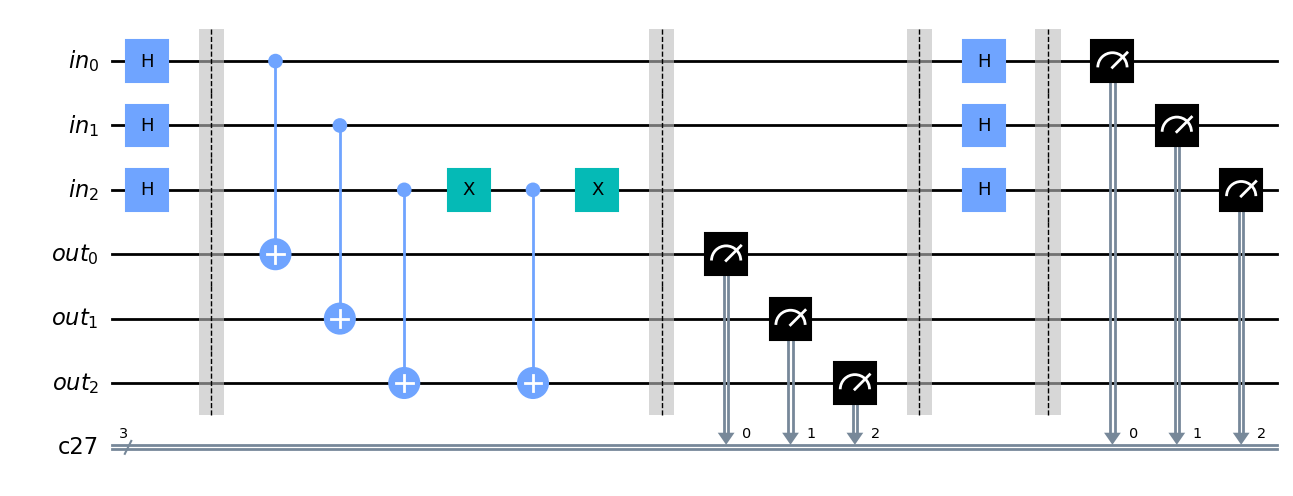

In [13]:
qin = QuantumRegister(3, name="in")
qout = QuantumRegister(3, name="out")
c = ClassicalRegister(3)

qc = QuantumCircuit(qin,qout,c)

#Aplicamos una compuerta H a todos los qubits del input
for i in range(3):
    qc.h(qin[i])
    
qc.barrier()
    
#Aplicamos el operador Q_f
for i in range(3):
    qc.cx(qin[i],qout[i])
    
qc.x(qin[2])
qc.cx(qin[2],qout[2])
qc.x(qin[2])

qc.barrier()

#Medimos los qubits del output
qc.measure(qout,c)

qc.barrier()

#Aplicamos una compuerta H a todos los qubits del input nuevamente
for i in range(3):
    qc.h(qin[i])
    
qc.barrier()
    
#Medimos los qubits del input
qc.measure(qin,c)

qc.draw(output="mpl")

In [14]:
#Ejecutamos el circuito 3 veces y repetimos hasta obtener 3 cadenas de bits distintas
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=3)
counts = job.result().get_counts(qc)
print(counts)

{'011': 1, '001': 1, '010': 1}


En este ejemplo, obtuvimos las cadenas de bits $011$, $001$ y $010$. Con ellas obtenemos el siguiente sistema de ecuaciones:

$\hspace{9 cm} b_{1}+b_{0} = 0 \hspace{1 cm} b_{0} = 0 \hspace{1 cm} b_{1} = 0$

Si bien obtuvimos tres cadenas linealmente dependientes que solo nos dan la información certera de que $b_{0} = b_{1} = 0$, si probamos correr la celda que ejecuta el circuito múltiples veces nos daremos cuenta de que jamás obtenemos una cadena de bits que tena un $1$ en $b_{2}$, por lo que $b=100$.

---

Probemos ejecutar un circuito con una función $f(x)$ uno a uno, para ver cómo difiere del ejemplo anterior.

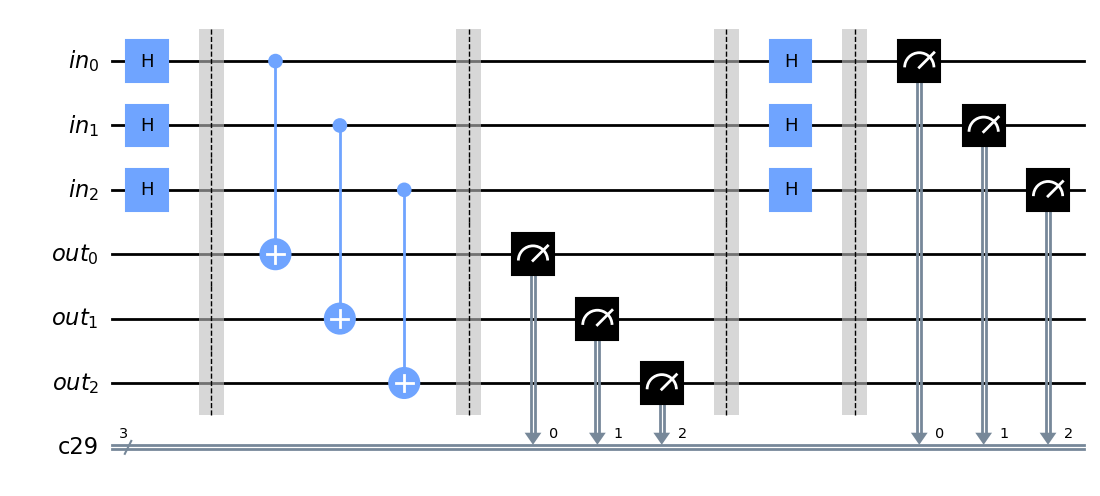

In [16]:
qin = QuantumRegister(3, name="in")
qout = QuantumRegister(3, name="out")
c = ClassicalRegister(3)

qc = QuantumCircuit(qin,qout,c)

#Aplicamos una compuerta H a todos los qubits del input
for i in range(3):
    qc.h(qin[i])
    
qc.barrier()
    
#Aplicamos el operador Q_f
for i in range(3):
    qc.cx(qin[i],qout[i])

qc.barrier()

#Medimos los qubits del output
qc.measure(qout,c)

qc.barrier()

#Aplicamos una compuerta H a todos los qubits del input nuevamente
for i in range(3):
    qc.h(qin[i])
    
qc.barrier()
    
#Medimos los qubits del input
qc.measure(qin,c)

qc.draw(output="mpl")

In [21]:
#Ejecutamos el circuito 3 veces y repetimos hasta obtener tres cadenas de bits útiles
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=3)
counts = job.result().get_counts(qc)
print(counts)

{'010': 1, '101': 1, '001': 1}


En este caso obtuvimos las cadenas de bits $010$, $101$ y $001$, las cuales forman el sistema

$\hspace{9 cm} b_{2}+b_{0} = 0 \hspace{1 cm} b_{0} = 0 \hspace{1 cm} b_{1} = 0$

Ya que $b_{0}=0$, la única opción para resolver la primera ecuación es $b_{2}=0$, por lo que $b=000$ y nuestra funnción es uno a uno. 

Si bien de momento parece que este algoritmo no ofrece mucha ventaja respecto a su versión clásica, es cuando aumentamos el valor de $n$ que queda de manifiesto la ventaja del algoritmo cuántico.